# Coding

### Import libraries

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### Connect to SQLite DB

In [3]:
conn = sqlite3.connect("CaseDB")

df1 = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

df1["ActivityHour"] = df1["ActivityHour"].apply(lambda x: pd.Timestamp(x))

df1.to_sql("hourlySteps_merged",conn,if_exists="replace",index=False)

22099

### Use SQLite to manipulate the data

In [4]:
data1 = pd.read_sql("""
SELECT
    STRFTIME("%H:%M",ActivityHour) AS Time,
    SUM(StepTotal) AS `Number of Step`
FROM
    hourlySteps_merged
GROUP BY
    Time
""",conn)

data1

,Time,Number of Step
0,00:00,39404
1,01:00,21555
2,02:00,15964
3,03:00,5996
4,04:00,11836
5,05:00,40886
6,06:00,166191
7,07:00,284932
8,08:00,398044
9,09:00,403404


### Plot with Seaborn and Matplotlib

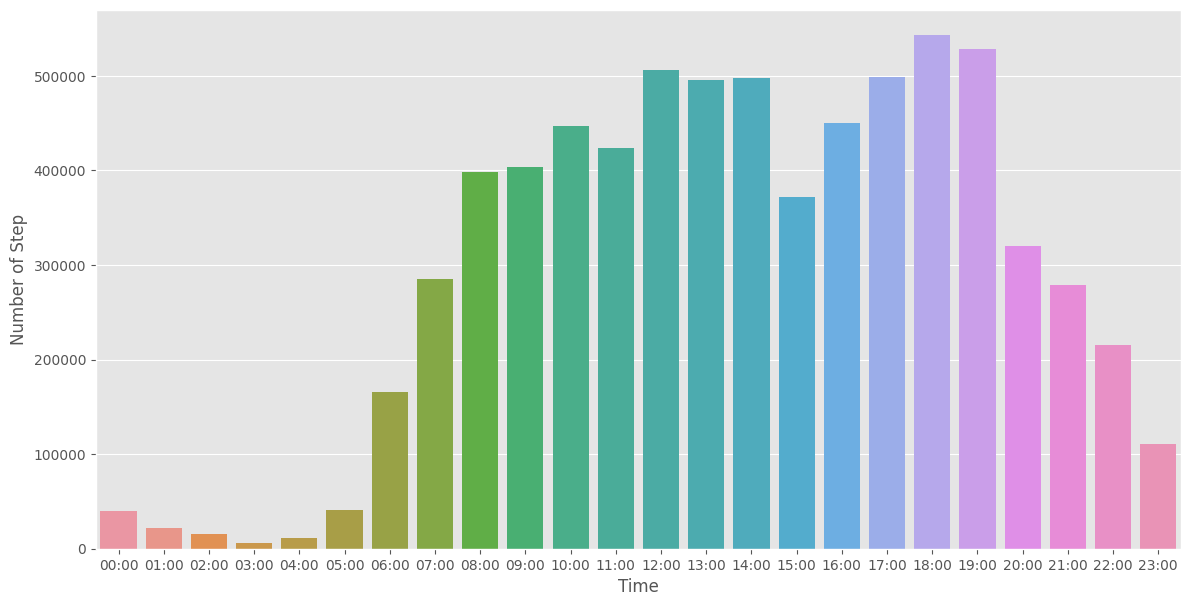

In [5]:
plt.style.use("ggplot")
plt.figure(figsize=(14,7))

sns.barplot(data1,x="Time",y="Number of Step")

plt.show()

### Connect to SQLite DB again and manipulate the data with Pandas

In [6]:
df2 = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

df2["ActivityDate"] = pd.to_datetime(df2["ActivityDate"])

df2["Days"] = df2["ActivityDate"].dt.day_name()
df2["DayNum"] = df2["ActivityDate"].dt.weekday

df2.to_sql("dailyActivity_merged",conn,if_exists="replace",index=False)

940

### Manipulate the data with SQLite again

In [7]:
data2 = pd.read_sql("""
SELECT
    Days,
    AVG(TotalSteps) AS `Number of Step`,
    AVG(Calories) AS Cal
FROM
    dailyActivity_merged
GROUP BY
    Days
ORDER BY
    DayNum
""",conn)

data2

,Days,Number of Step,Cal
0,Monday,7780.866667,2324.208333
1,Tuesday,8125.006579,2356.013158
2,Wednesday,7559.373333,2302.620000
3,Thursday,7405.836735,2199.571429
4,Friday,7448.230159,2331.785714
5,Saturday,8152.975806,2354.967742
6,Sunday,6933.231405,2263.000000


### Plot with seaborn again

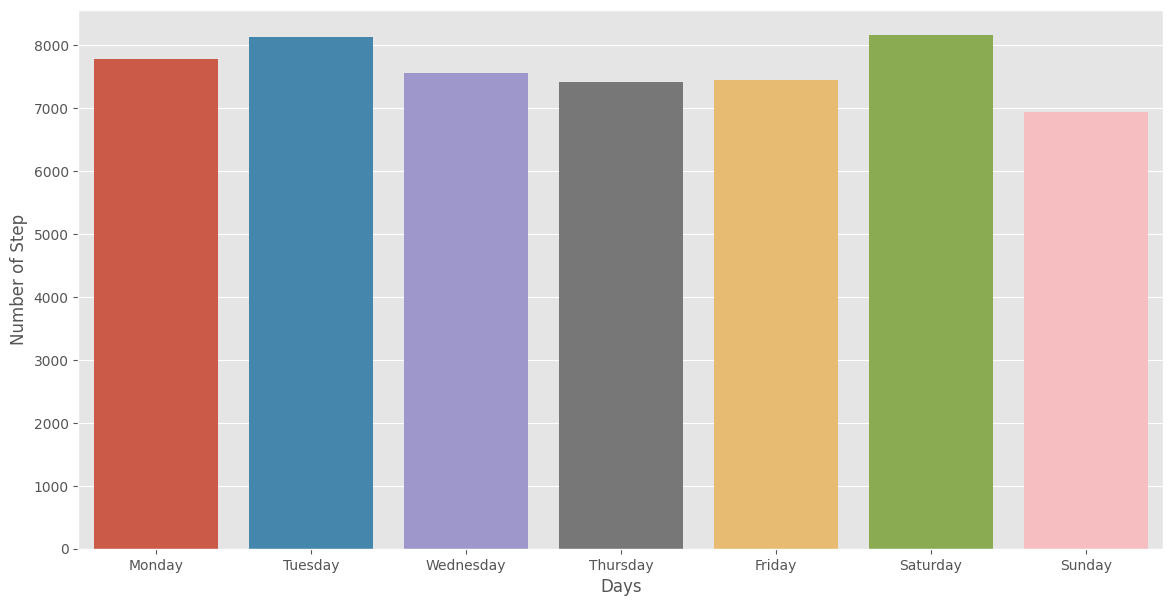

In [8]:
plt.figure(figsize=(14,7))

sns.barplot(data2,x="Days",y="Number of Step")

plt.show()

### Connect to SQLite DB

In [9]:
df3 = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

df3.to_sql("sleepDay_merged",conn,if_exists="replace",index=False)

413

### Manipulate the data with SQLite

In [10]:
data3 = pd.read_sql("""
SELECT
    id,
    AVG(TotalMinutesAsleep) AS `Hours of Sleep`
FROM
    sleepDay_merged
GROUP BY
    id
""",conn)

data3

,Id,Hours of Sleep
0,1503960366,360.280000
1,1644430081,294.000000
2,1844505072,652.000000
3,1927972279,417.000000
4,2026352035,506.178571
5,2320127002,61.000000
6,2347167796,446.800000
7,3977333714,293.642857
8,4020332650,349.375000
9,4319703577,476.653846


### Plot the data with Seaborn

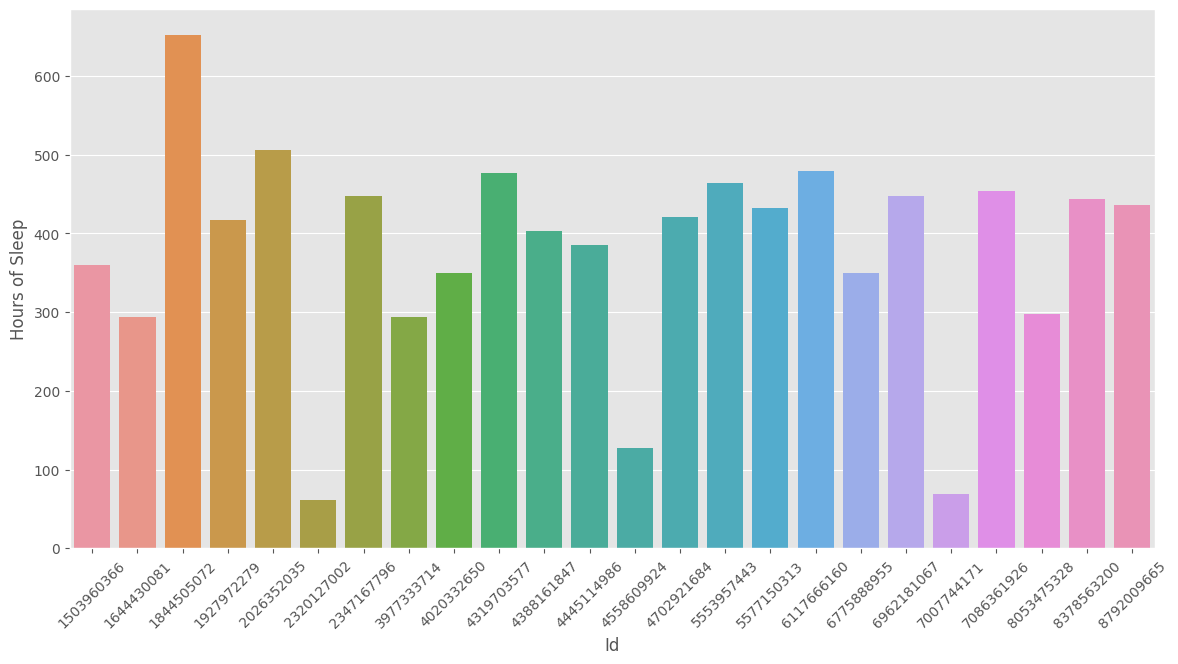

In [11]:
plt.figure(figsize=(14,7))

sns.barplot(data3,x="Id",y="Hours of Sleep")

plt.xticks(rotation=45)
plt.show()

### Connect to SQLite DB again

In [12]:
df4 = pd.read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

df4.to_sql("weightLogInfo_merged",conn,if_exists="replace",index=False)

67

### Manipulate the data with SQLite again

In [13]:
data4 = pd.read_sql("""
SELECT
    id,
    Count(*) AS Report,
    AVG(BMI) AS BMI
FROM
    weightLogInfo_merged
GROUP BY
    id
""",conn)

data4

,Id,Report,BMI
0,1503960366,2,22.650000
1,1927972279,1,47.540001
2,2873212765,2,21.570001
3,4319703577,2,27.415000
4,4558609924,5,27.214000
5,5577150313,1,28.000000
6,6962181067,30,24.028000
7,8877689391,24,25.487083


### Plot again

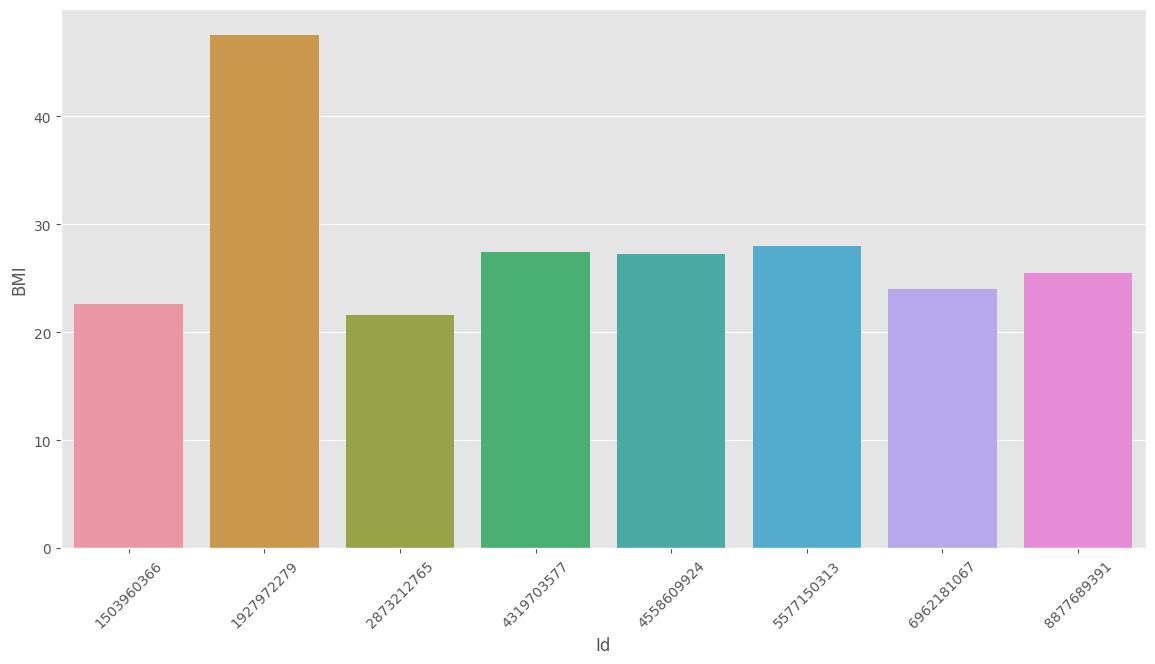

In [14]:
plt.figure(figsize=(14,7))

sns.barplot(data4,x="Id",y="BMI")

plt.xticks(rotation=45)
plt.show()

### The same steps

In [15]:
df5 = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")

df5.to_sql("minuteMETsNarrow_merged",conn,if_exists="replace",index=False)

1325580

In [16]:
data5 = pd.read_sql("""
SELECT
    id,
    SUM(METs) AS MET
FROM
    minuteMETsNarrow_merged
GROUP BY
    id
""",conn)

data5

,Id,MET
0,1503960366,717081
1,1624580081,552972
2,1644430081,599294
3,1844505072,520968
4,1927972279,470228
5,2022484408,747732
6,2026352035,615451
7,2320127002,580488
8,2347167796,390497
9,2873212765,674989


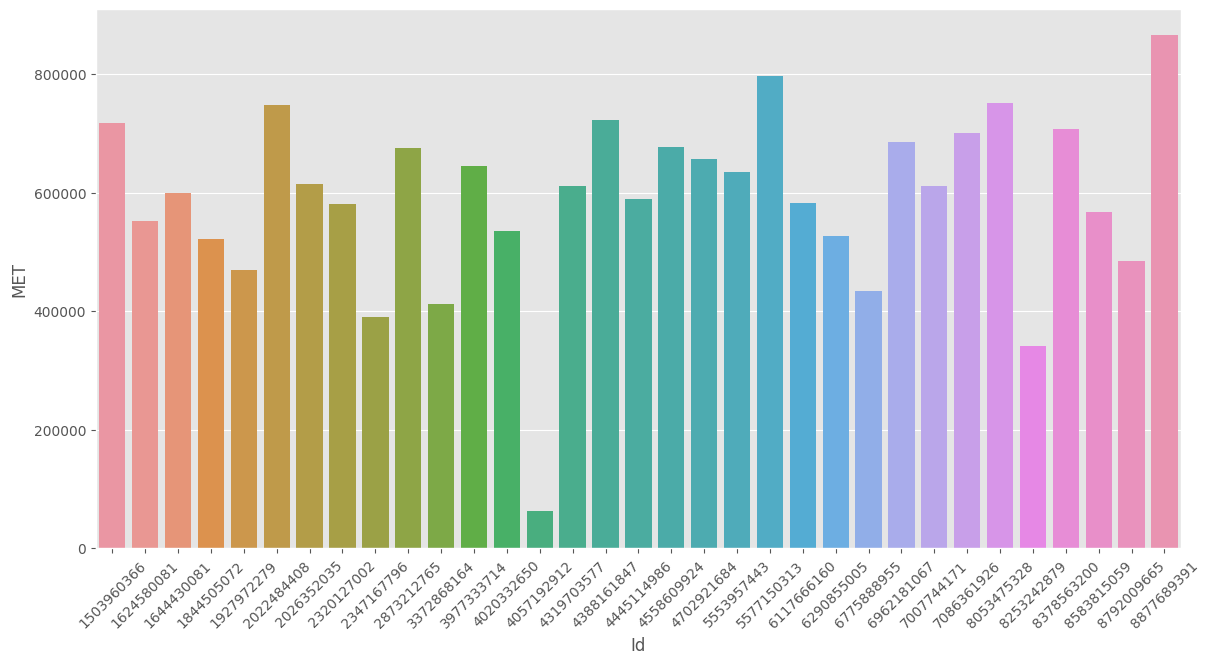

In [17]:
plt.figure(figsize=(14,7))

sns.barplot(data5,x="Id",y="MET")

plt.xticks(rotation=45)
plt.show()

### Join and merge the data, and use statistics to find a correlation

In [23]:
data = pd.read_sql("""
SELECT
    d.Id,
    AVG(d.TotalSteps) AS `Average Number of Step`,
    AVG(d.Calories) AS Cal,
    AVG(s.TotalMinutesAsleep) AS `Average Hours of Sleep`
FROM
    dailyActivity_merged d
JOIN
    sleepDay_merged s
ON
    d.Id = s.Id
GROUP BY
    d.Id
""",conn)

data = pd.merge(data,data5,"inner","Id")

res = pearsonr(data["Average Number of Step"],data["MET"])
res

PearsonRResult(statistic=0.6783759020376665, pvalue=0.0002689616685513823)

### Plot the merged data to analyse the data

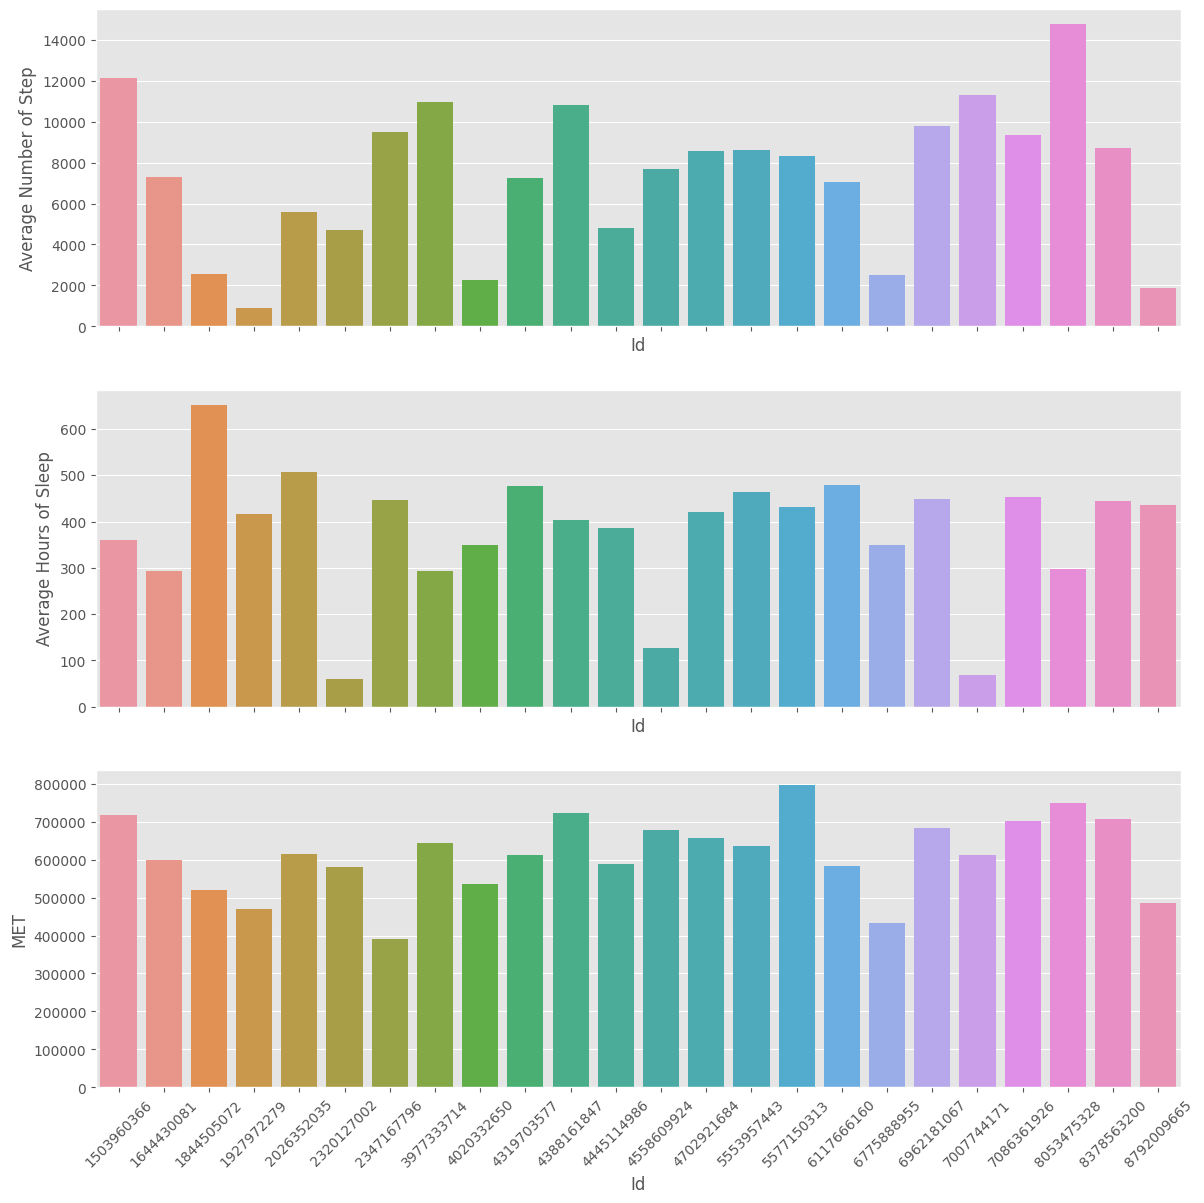

In [19]:
fig, ax = plt.subplots(3,1,sharex=True,figsize=(14,14))

sns.barplot(data,x="Id",y="Average Number of Step",ax=ax[0])
sns.barplot(data,x="Id",y="Average Hours of Sleep",ax=ax[1])
sns.barplot(data,x="Id",y="MET",ax=ax[2])

plt.xticks(rotation=45)
plt.show()